In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import matplotlib
import numpy as np
from matplotlib.lines import Line2D


city = 2 # 1 - samara, 2 - chelyabinsk

population_size = {1: 1158518, 2: 1189524}
# population_size = {1: 100000, 2: 100000}

num_of_results = 9




def get_data(city):
    epid_data = [pd.read_csv(f'results/' + str(city) + f'/temp_results_{i}.csv', 
                            sep='\t', dtype=int) for i in range(num_of_results)]
    data = []
    min_len = min([len(i) for i in epid_data])
    for i in range(num_of_results):
        data.append(epid_data[i]['H1N1'].values[:min_len])
    data = np.array(data)/population_size[city]*100000

    mean_data = np.mean(data, axis=0)
    days = np.linspace(1,len(mean_data), len(mean_data))
    confidence = 3*np.std(data, axis=0)
    print("Maximum day of simulation for all processed:", min_len)
    return days, data, mean_data, confidence

days_samara, data_samara, mean_data_samara, confidence_samara = get_data(1)
days_chelyabinsk, data_chelyabinsk, mean_data_chelyabinsk, confidence_chelyabinsk = get_data(2)

Maximum day of simulation for all processed: 149
Maximum day of simulation for all processed: 149


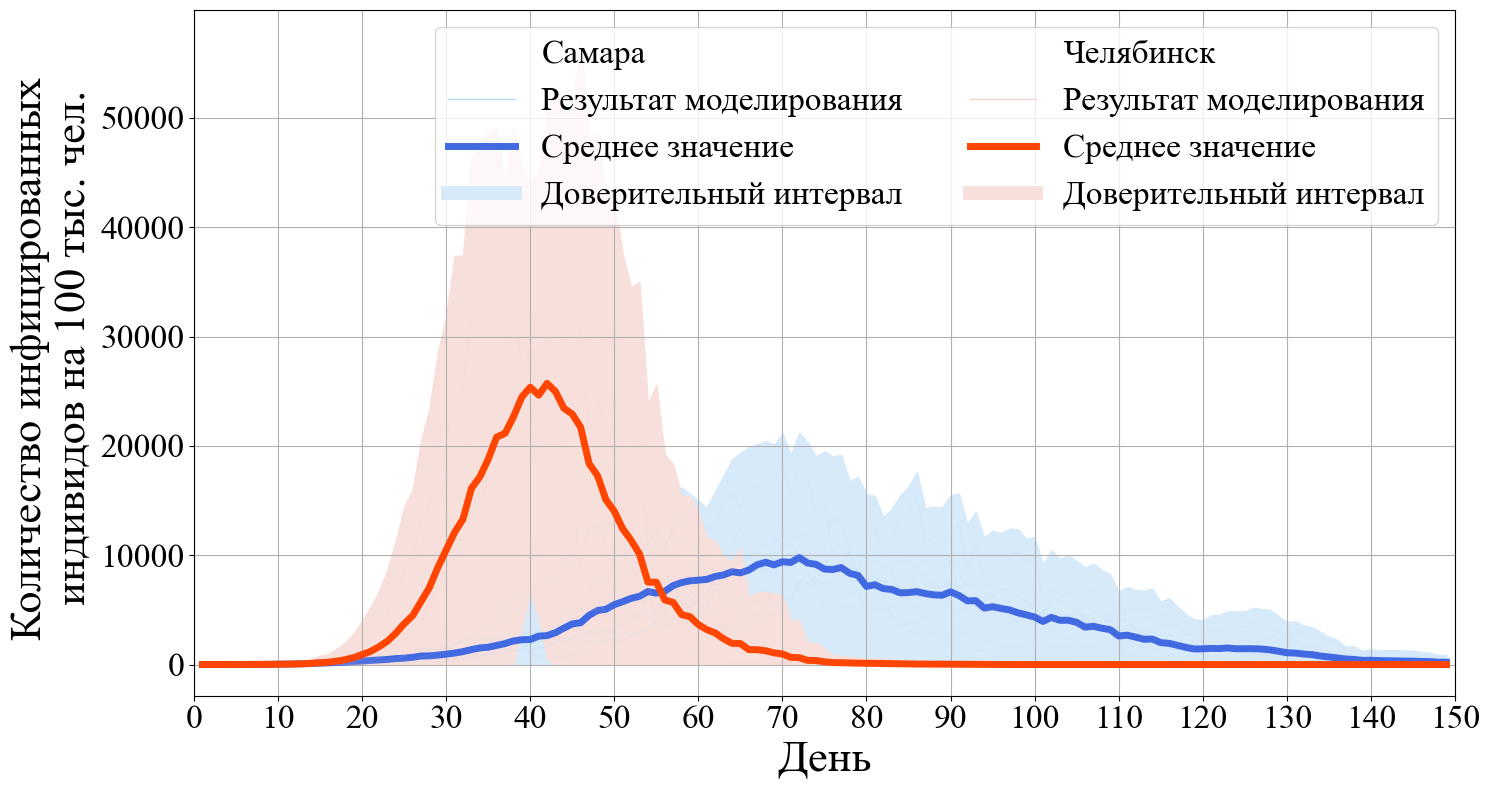

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [27]:
matplotlib.pyplot.rcParams.update({
    # 'text.usetex' : True,
    # 'font.family' : 'STIXGeneral',
    'font.family' : 'Times New Roman',
})

# plt.rc('text', usetex=True ) 
# plt.rc('font',family = 'sans-serif',  size=28)


fig, ax = plt.subplots(figsize=(15, 8), tight_layout=True)

title_font_size = 40 
axis_font_size = 32 
ticks_font_size = 24 
legend_font_size = 24 
title_pad = 10 



def plot_city(days, data, mean_data, confidence, set_color):
    color_mean, color_line, color_error = set_color
    conf_low = [mean_data[i] - confidence[i] if mean_data[i] - confidence[i] > 0 else 0 for i in range(len(mean_data))] 

    for sample in data:
        ax.plot(days, sample, linewidth=1, color=color_line, alpha=0.1) 
    ax.plot(days, mean_data, '-', color = color_mean, linewidth=5)

    plt.fill_between(days, conf_low, mean_data + confidence,  color=color_error)

    custom_lines = [Line2D([0], [0], color='royalblue', lw=1),
                    Line2D([0], [0], color='royalblue', lw=3),
                    Line2D([0], [0], color='grey', lw=10, alpha=0.1)]

    
    ax.set_xlabel('День', fontsize=axis_font_size)
    ax.set_xlim([1,len(days)])
    x_ticks = [10*i for i in range(int(150/10)+1)]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, fontsize=ticks_font_size)
    y_ticks = [10000*i for i in range(6)]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks, fontsize=ticks_font_size)
    # ax.set_yticklabels(y_ticks, fontsize=ticks_font_size)

ax.plot([], [], ' ')
plot_city(days_samara, data_samara, mean_data_samara, confidence_samara, ('royalblue', '#bcd9f7', '#d7eafa'))
ax.plot([], [], ' ')
plot_city(days_chelyabinsk, data_chelyabinsk, mean_data_chelyabinsk, confidence_chelyabinsk, ('orangered', '#fad1ca', '#f7e0dc'))


custom_lines = [Line2D([0], [0], color='#ffffff', lw=0),
    Line2D([0], [0], color='#bcd9f7', lw=1),
    Line2D([0], [0], color='royalblue', lw=5),
    Line2D([0], [0], color='#d7eafa', lw=10),
    Line2D([0], [0], color='#ffffff', lw=0),
    Line2D([0], [0], color='#fad1ca', lw=1),
    Line2D([0], [0], color='orangered', lw=5),
    Line2D([0], [0], color='#f7e0dc', lw=10)]



ax.legend(custom_lines, ['Самара', 'Результат моделирования' , 'Среднее значение', 'Доверительный интервал', 
                         'Челябинск', 'Результат моделирования', 'Среднее значение', 'Доверительный интервал'], fontsize=legend_font_size, ncol=2)
ax.set_ylabel('Количество инфицированных \n индивидов на 100 тыс. чел.', fontsize=axis_font_size)
ax.grid()
plt.show()

fig.savefig('output/Korzin_fig5.eps', format='eps', bbox_inches='tight')
fig.savefig('output/Korzin_fig5.png', dpi=600, bbox_inches='tight')
fig.savefig('output/Korzin_fig5.pdf', dpi=600, bbox_inches='tight')
# fig.savefig('city_compare.png'.format(city), dpi=500, bbox_inches='tight')

# fig.savefig('city_{}.png'.format(city), dpi=200, bbox_inches='tight')
# fig.savefig('city_{}.pdf'.format(city), dpi=200, bbox_inches='tight')

In [3]:
# fig, axs = plt.subplots(1, 3, figsize=(40, 10))
# axs[0].imshow(plt.imread('sampling_5.png'))
# axs[0].set_axis_off()
# axs[1].imshow(plt.imread('sampling_15.png'))
# axs[1].set_axis_off()
# axs[2].imshow(plt.imread('sampling_25.png'))
# axs[2].set_axis_off()
# plt.gcf().text(0.138, 0.2, r'\textbf{a)}', fontsize=50) 
# plt.gcf().text(0.4, 0.2, r'\textbf{b)}', fontsize=50) 
# plt.gcf().text(0.665, 0.2, r'\textbf{c)}', fontsize=50) 
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.show()

# fig.savefig('fig8.pdf', dpi=300, bbox_inches='tight')
# fig.savefig('fig8.png', dpi=300, bbox_inches='tight')